In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

C:\Users\Vasu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier

In [3]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,accuracy_score,confusion_matrix,f1_score

In [4]:
from scipy.stats import shapiro,ttest_ind,mannwhitneyu

## 1 

In [5]:
loan=pd.read_csv(r"C:\Users\Vasu\Downloads\great lakes assignments\projects\loan prediction\train_ctrUa4K.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan.shape

(614, 13)

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
loan.drop('Loan_ID',axis=1,inplace=True)

In [10]:
categorical_variables=loan.select_dtypes(include='object').columns
print(categorical_variables)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


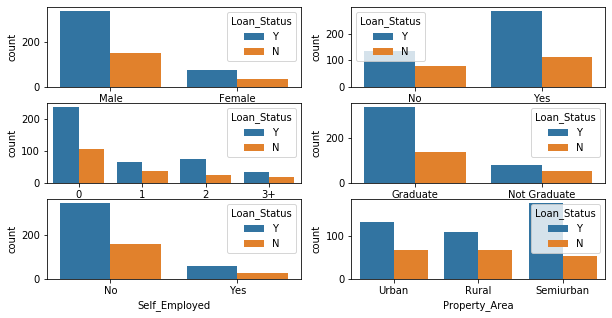

In [11]:
fig,axes=plt.subplots(3,2,figsize=(10,5))
for idx in range(len(categorical_variables)-1):
    row,col=idx//2,idx%2
    sns.countplot(data=loan,x=categorical_variables[idx],hue='Loan_Status',ax=axes[row,col])  

In [12]:
loan['Dependents']=loan['Dependents'].replace('3+','3')
loan['Gender']=loan['Gender'].replace({'Male':0,'Female':1})
loan['Married']=loan['Married'].replace({'Yes':1,'No':0})
loan['Loan_Status']=loan['Loan_Status'].replace({'Y':1,'N':0})
loan['Education']=loan['Education'].replace({'Graduate':1,'Not Graduate':0})
loan['Self_Employed']=loan['Self_Employed'].replace({'Yes':1,'No':0})

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
loan['Property_Area']=le.fit_transform(loan['Property_Area'])

In [15]:
import random

In [16]:
values=[0,1]
loan['Gender'].fillna(random.choice(values),inplace=True)
loan['Married'].fillna(random.choice(values),inplace=True)
loan['Self_Employed'].fillna(random.choice(values),inplace=True)


In [17]:
values=[0,1,2,3]
loan['Dependents'].fillna(random.choice(values),inplace=True)

In [18]:
from sklearn.impute import KNNImputer
knn_imp=KNNImputer(n_neighbors=5)

In [19]:
df_filled=knn_imp.fit_transform(loan)
df_filled=pd.DataFrame(df_filled,columns=loan.columns)

In [20]:
df_filled.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
df_filled["Loan_Status"].value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

## 2

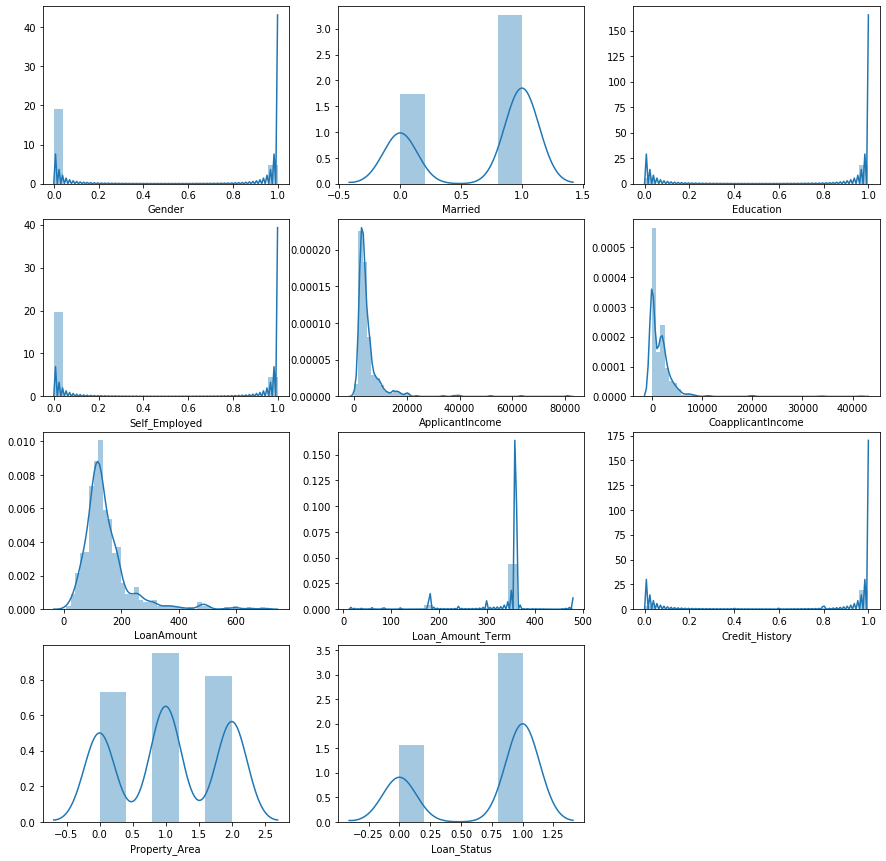

In [22]:
columns=loan.select_dtypes(exclude='object').columns
f=plt.figure(figsize=(15,15))
count=1
for i in columns:
    ax=f.add_subplot(4,3,count)
    sns.distplot(df_filled[i],ax=ax)
    count=count+1
plt.show()

## 3

In [23]:
df_filled.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.336818,-0.148500,0.061497,0.039440,-0.013933,-0.082316,-0.064314,0.066126,-0.028166,0.017054,-0.025407
Married,-0.336818,1.000000,0.334216,-0.012304,-0.021584,0.051708,0.075948,0.148906,-0.099131,0.005345,0.004257,0.091478
Dependents,-0.148500,0.334216,1.000000,-0.055752,0.042142,0.118202,0.030430,0.148164,-0.097937,-0.051356,-0.000244,0.010118
Education,0.061497,-0.012304,-0.055752,1.000000,0.019059,0.140760,0.062290,0.176451,0.075167,0.085432,0.065243,0.085884
Self_Employed,0.039440,-0.021584,0.042142,0.019059,1.000000,0.121356,0.028834,0.107693,-0.039239,0.035796,-0.022732,0.005857
ApplicantIncome,-0.013933,0.051708,0.118202,0.140760,0.121356,1.000000,-0.116605,0.579095,-0.044370,-0.010383,-0.009500,-0.004710
CoapplicantIncome,-0.082316,0.075948,0.030430,0.062290,0.028834,-0.116605,1.000000,0.183089,-0.060167,-0.013241,0.010522,-0.059187
LoanAmount,-0.064314,0.148906,0.148164,0.176451,0.107693,0.579095,0.183089,1.000000,0.039784,0.002419,-0.057297,-0.038352
Loan_Amount_Term,0.066126,-0.099131,-0.097937,0.075167,-0.039239,-0.044370,-0.060167,0.039784,1.000000,-0.001074,-0.078633,-0.021266
Credit_History,-0.028166,0.005345,-0.051356,0.085432,0.035796,-0.010383,-0.013241,0.002419,-0.001074,1.000000,-0.000978,0.541337


In [24]:
df_0=df_filled[df_filled["Loan_Status"]==0]
df_1=df_filled[df_filled["Loan_Status"]==1]

In [25]:
X=df_filled.drop("Loan_Status",axis=1)
y=df_filled.Loan_Status

In [26]:
from scipy.stats import shapiro,ttest_ind,mannwhitneyu

In [27]:
cols=[]
def dependency_test(full_df,df_0,df_1):
    for col in full_df.columns:
        out=shapiro(full_df[col])
        if out[1] < 0.05:       #column does not have a normal distribution, thus non parametric test
            independent=mannwhitneyu(df_0[col],df_1[col])
            if independent[1] < 0.05:
                cols.append(col)
        else:
            independent=ttest_ind(df_0[col],df_1[col])
            if independent[1] < 0.05:
                cols.append(col)
    return cols

cols=dependency_test(X,df_0,df_1)
print("Features which are linearly separable")
print(cols)        

Features which are linearly separable
['Married', 'Education', 'Credit_History']


In [28]:
X=df_filled[cols]

In [29]:
from sklearn.preprocessing import StandardScaler
Xs=StandardScaler().fit_transform(X)

In [30]:
Xs=pd.DataFrame(Xs,columns=X.columns)

## 4

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

print('No loan', round(y.value_counts()[0]/len(y) * 100,2), '% of the dataset')
print('Loan given', round(y.value_counts()[1]/len(y) * 100,2), '% of the dataset')
print('-'*50)

sss = StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.3)

for train_index, test_index in sss.split(Xs, y):
    X_train, X_test = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
print('No loan', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset in train')
print('Loan given', round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset in train')

print('-'*50)

print('No loan', round(y_test.value_counts()[0]/len(y_test) * 100,2), '% of the dataset in test')
print('Loan given', round(y_test.value_counts()[1]/len(y_test) * 100,2), '% of the dataset in test')

No loan 31.27 % of the dataset
Loan given 68.73 % of the dataset
--------------------------------------------------
No loan 31.24 % of the dataset in train
Loan given 68.76 % of the dataset in train
--------------------------------------------------
No loan 31.35 % of the dataset in test
Loan given 68.65 % of the dataset in test


In [32]:
#X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.30, random_state=0)

In [33]:
ttest_ind(Xs,X_train)

Ttest_indResult(statistic=array([ 0.55561868,  0.30077182, -0.16588899]), pvalue=array([0.57859094, 0.76364855, 0.86827652]))

In [34]:
ttest_ind(Xs,X_test)

Ttest_indResult(statistic=array([-0.97735546, -0.52972128,  0.28645234]), pvalue=array([0.32868976, 0.59645271, 0.77460613]))

## Model Selection

In [35]:
log_reg=LogisticRegression()
nb=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=10)
dt=DecisionTreeClassifier(max_depth=5,random_state=0)
rf=RandomForestClassifier(random_state=0)
bagging=BaggingClassifier(random_state=0)
adaboost=AdaBoostClassifier(random_state=0)
gradboost=GradientBoostingClassifier(random_state=0)
#stacking=VotingClassifier(estimators=[(1),(2),(3)],voting='soft')#soft - weighted , hard - unweighted 

In [36]:
models=[]
models.append(("Logistic Regression",log_reg))
models.append(("Naive Bayes",nb))
models.append(("KNN",knn))
models.append(("Decision Tree",dt))
models.append(("Random Forest",rf))
models.append(("Bagging",bagging))
models.append(("Ada Boost",adaboost))
models.append(("Gradient Boost",gradboost))

In [37]:
# evaluate each model in turn
results = []
names = []
print(f'classifier\t\tBias Error\tVariance Error')
print('-'*55)
for name, model in models:
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results =cross_val_score(model, Xs, y,cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print(f'{name:23}: {round(np.mean(1-cv_results),3):5}  {round(np.var(cv_results,ddof=1),7):19}')
    print('-'*55)

classifier		Bias Error	Variance Error
-------------------------------------------------------
Logistic Regression    : 0.249            0.0005305
-------------------------------------------------------
Naive Bayes            : 0.255            0.0007108
-------------------------------------------------------
KNN                    : 0.284            0.0082271
-------------------------------------------------------
Decision Tree          : 0.271            0.0007537
-------------------------------------------------------
Random Forest          : 0.268            0.0004742
-------------------------------------------------------
Bagging                : 0.265            0.0007068
-------------------------------------------------------
Ada Boost              : 0.259            0.0006981
-------------------------------------------------------
Gradient Boost         : 0.273            0.0009002
-------------------------------------------------------


### Log reg

In [38]:
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  429
Model:                            GLM   Df Residuals:                      425
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -207.00
Date:                Wed, 10 Jun 2020   Deviance:                       414.01
Time:                        03:23:28   Pearson chi2:                     434.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.8236      0.127      6.494      0.000       0.575       1.072
Married            0.2745      0.119      2.297      0.022       0.040       0.509
Education          0.0717      0.118      0.607      0.544      -0.160       0.303
Credit_History     1.2624      0.155      8.123      0.000       0.958       1.567
==================================================================================
"""

In [39]:
auc_be=[]
auc_ve=[]
log_reg=LogisticRegression()
kfold=KFold(shuffle=True,n_splits=3,random_state=0)    #random state can be set here explicitly
scores=cross_val_score(log_reg,X_train,y_train,cv=kfold,scoring="roc_auc")
auc_be.append(np.mean(1-scores))
auc_ve.append(np.var(scores,ddof=1))
print(np.min(auc_be), ":Bias error")
print(np.min(auc_ve), ":Variance error")

0.25220020307887475 :Bias error
0.0010790040572120805 :Variance error


In [40]:
model=log_reg.fit(X_train,y_train)
predictions_lr=log_reg.predict(X_test)
log_reg.score(X_test,y_test)

0.8216216216216217

### Naive Bayes:

In [41]:
auc_be=[]
auc_ve=[]
nb=GaussianNB()
kfold=KFold(shuffle=True,n_splits=3,random_state=0)    #random state can be set here explicitly
scores=cross_val_score(nb,X_train,y_train,cv=kfold,scoring="roc_auc")
auc_be.append(np.mean(1-scores))
auc_ve.append(np.var(scores,ddof=1))
print(np.min(auc_be), ":Bias error")
print(np.min(auc_ve), ":Variance error")

0.25915248192872903 :Bias error
0.0010771883474161136 :Variance error


In [42]:
model=nb.fit(X_train,y_train)
predictions_nb=nb.predict(X_test)
nb.score(X_test,y_test)

0.8162162162162162

### KNN

In [43]:
auc_be=[]
auc_ve=[]
for n in np.arange(1,75):
    knn=KNeighborsClassifier(n_neighbors=n)
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)    #random state can be set here explicitly
    scores=cross_val_score(knn,Xs,y,cv=kfold,scoring="roc_auc")
    auc_be.append(np.mean(1-scores))
    auc_ve.append(np.var(scores,ddof=1))
print(np.min(auc_be),np.argmin(auc_be))
print(np.min(auc_ve),np.argmin(auc_ve))

0.2517096076002538 58
8.095634000366307e-06 67


In [44]:
print(np.min(auc_be),auc_ve[58],np.argmin(auc_be))
print(auc_be[67],np.min(auc_ve),np.argmin(auc_ve))

0.2517096076002538 0.00012025316468041747 58
0.2581797968790153 8.095634000366307e-06 67


In [45]:
print(auc_be[56],auc_ve[56])

0.2583695447653375 3.402884314703063e-05


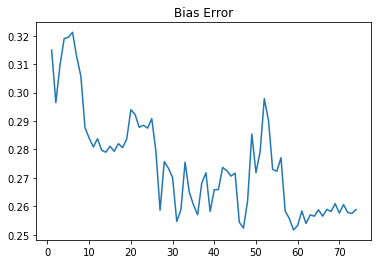

best n_estimator based on bias error =  59


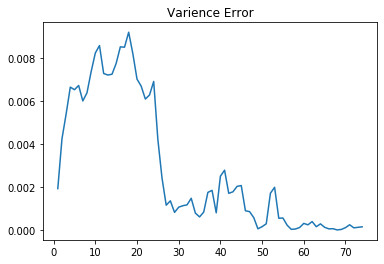

best n_estimator based on variance error =  68


In [46]:
x_axis=np.arange(1,75)
plt.plot(x_axis,auc_be)
plt.title('Bias Error')
plt.show()
print('best n_estimator based on bias error = ',(np.argmin(auc_be)+1))
plt.plot(x_axis,auc_ve)
plt.title('Varience Error')
plt.show()
print('best n_estimator based on variance error = ',(np.argmin(auc_ve)+1))

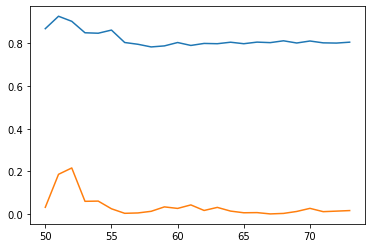

In [47]:
auc_be_sc=auc_be/np.max(auc_be)
auc_ve_sc=auc_ve/np.max(auc_ve)
x_axis=np.arange(50,len(auc_be))
plt.plot(x_axis,auc_be_sc[50:])
plt.plot(x_axis,auc_ve_sc[50:])
plt.show()

KNN : has very less variance error at 56 index position

### Decision tree

In [48]:
auc_be=[]
auc_ve=[]
for n in np.arange(1,10):
    dt=DecisionTreeClassifier(max_depth=n) #gini
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)    #random state can be set here explicitly
    scores=cross_val_score(dt,Xs,y,cv=kfold,scoring="roc_auc")
    auc_be.append(np.mean(1-scores))
    auc_ve.append(np.var(scores,ddof=1))
print(np.min(auc_be),np.argmin(auc_be))
print(np.min(auc_ve),np.argmin(auc_ve))

0.25863390267506287 2
0.0007509981799009844 5


In [49]:
print(np.min(auc_be),auc_ve[5],np.argmin(auc_be))
print(auc_be[2],np.min(auc_ve),np.argmin(auc_ve))

0.25863390267506287 0.0007509981799009844 2
0.25863390267506287 0.0007509981799009844 5


In [50]:
auc_be=[]
auc_ve=[]
for n in np.arange(1,10):
    dt=DecisionTreeClassifier(max_depth=n,criterion="entropy") #entropy
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)    #random state can be set here explicitly
    scores=cross_val_score(dt,Xs,y,cv=kfold,scoring="roc_auc")
    auc_be.append(np.mean(1-scores))
    auc_ve.append(np.var(scores,ddof=1))
print(np.min(auc_be),np.argmin(auc_be))
print(np.min(auc_ve),np.argmin(auc_ve))

0.25863390267506287 2
0.0007509981799009844 5


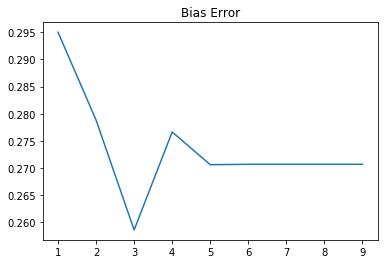

best n_estimator based on bias error =  3


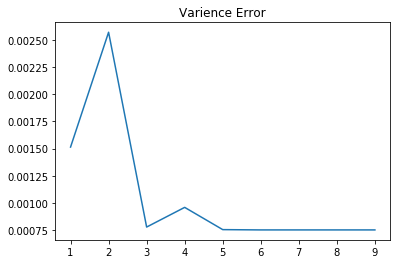

best n_estimator based on variance error =  6


In [51]:
x_axis=np.arange(1,10)
plt.plot(x_axis,auc_be)
plt.title('Bias Error')
plt.show()
print('best n_estimator based on bias error = ',(np.argmin(auc_be)+1))
plt.plot(x_axis,auc_ve)
plt.title('Varience Error')
plt.show()
print('best n_estimator based on variance error = ',(np.argmin(auc_ve)+1))

DT : at depth of 3 both bias and variance error seems to be less

## Random Forest:

In [52]:
auc_be=[]
auc_ve=[]
for n in np.arange(1,30):
    rf=RandomForestClassifier(n_estimators=n,max_depth=10) #gini
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)    #random state can be set here explicitly
    scores=cross_val_score(rf,Xs,y,cv=kfold,scoring="roc_auc")
    auc_be.append(np.mean(1-scores))
    auc_ve.append(np.var(scores,ddof=1))
print(np.min(auc_be),np.argmin(auc_be))
print(np.min(auc_ve),np.argmin(auc_ve))

0.2557505818717935 24
4.362317243724707e-05 5


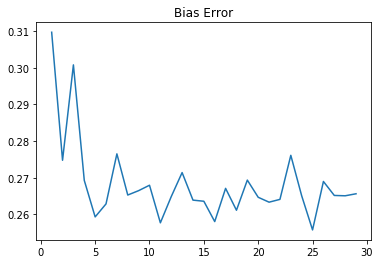

best n_estimator based on bias error =  25


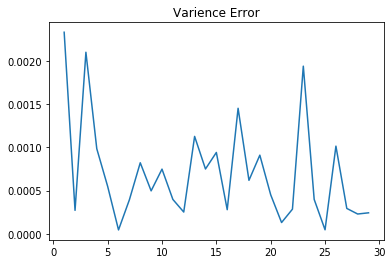

best n_estimator based on variance error =  6


In [53]:
x_axis=np.arange(1,30)
plt.plot(x_axis,auc_be)
plt.title('Bias Error')
plt.show()
print('best n_estimator based on bias error = ',(np.argmin(auc_be)+1))
plt.plot(x_axis,auc_ve)
plt.title('Varience Error')
plt.show()
print('best n_estimator based on variance error = ',(np.argmin(auc_ve)+1))

In [54]:
auc_be=[]
auc_ve=[]
for n in np.arange(1,30):
    rf=RandomForestClassifier(n_estimators=n,max_depth=10,criterion='entropy') #gini
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)    #random state can be set here explicitly
    scores=cross_val_score(rf,Xs,y,cv=kfold,scoring="roc_auc")
    auc_be.append(np.mean(1-scores))
    auc_ve.append(np.var(scores,ddof=1))
print(np.min(auc_be),np.argmin(auc_be))
print(np.min(auc_ve),np.argmin(auc_ve))

0.259019932366827 14
1.7651047649226833e-06 11


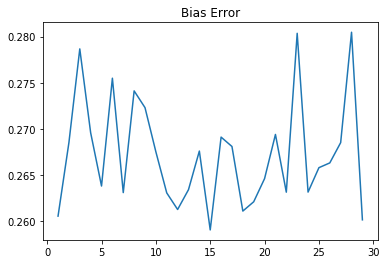

best n_estimator based on bias error =  15


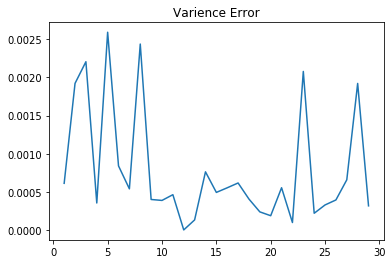

best n_estimator based on variance error =  12


In [55]:
x_axis=np.arange(1,30)
plt.plot(x_axis,auc_be)
plt.title('Bias Error')
plt.show()
print('best n_estimator based on bias error = ',(np.argmin(auc_be)+1))
plt.plot(x_axis,auc_ve)
plt.title('Varience Error')
plt.show()
print('best n_estimator based on variance error = ',(np.argmin(auc_ve)+1))

In [56]:
auc_be=[]
auc_ve=[]
for n in np.arange(1,30):
    rf=RandomForestClassifier(n_estimators=15,max_depth=n) #gini
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)    #random state can be set here explicitly
    scores=cross_val_score(rf,Xs,y,cv=kfold,scoring="roc_auc")
    auc_be.append(np.mean(1-scores))
    auc_ve.append(np.var(scores,ddof=1))
print(np.min(auc_be),np.argmin(auc_be))
print(np.min(auc_ve),np.argmin(auc_ve))

0.2487480106731045 0
1.6514873964686128e-05 0


In [57]:
auc_be=[]
auc_ve=[]
for n in np.arange(1,30):
    rf=RandomForestClassifier(n_estimators=n) #gini
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)    #random state can be set here explicitly
    scores=cross_val_score(rf,Xs,y,cv=kfold,scoring="roc_auc")
    auc_be.append(np.mean(1-scores))
    auc_ve.append(np.var(scores,ddof=1))
print(np.min(auc_be),np.argmin(auc_be))
print(np.min(auc_ve),np.argmin(auc_ve))

0.2554053616309812 6
0.00010590467027272608 19


##  Gradient Boosting

In [58]:
auc_be=[]
auc_ve=[]
for val in np.arange(1,20):
    grad_boost=GradientBoostingClassifier(n_estimators=val,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    scores = cross_val_score(grad_boost, Xs, y,cv=kfold, scoring='roc_auc')
    auc_be.append(np.mean(1-scores))
    auc_ve.append(np.var(scores,ddof=1))
print(np.min(auc_be),np.argmin(auc_be))
print(np.min(auc_ve),np.argmin(auc_ve))

0.2569993804300125 4
0.0003722187231392775 8


In [59]:
print(np.min(auc_be),auc_ve[4],np.argmin(auc_be))
print(auc_be[4],np.min(auc_ve),np.argmin(auc_ve))

0.2569993804300125 0.0006971297477231154 4
0.2569993804300125 0.0003722187231392775 8


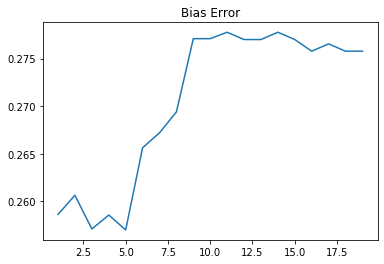

best n_estimator based on bias error =  5


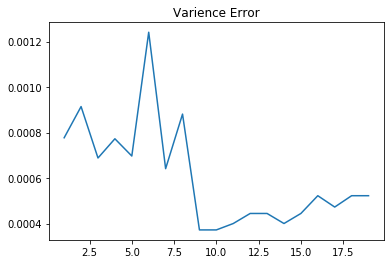

best n_estimator based on variance error =  9


In [60]:
x_axis=np.arange(1,20)
plt.plot(x_axis,auc_be)
plt.title('Bias Error')
plt.show()
print('best n_estimator based on bias error = ',(np.argmin(auc_be)+1))
plt.plot(x_axis,auc_ve)
plt.title('Varience Error')
plt.show()
print('best n_estimator based on variance error = ',(np.argmin(auc_ve)+1))

## Ada boosting

In [61]:
auc_be=[]
auc_ve=[]
for val in np.arange(1,20):
    ada_boost=AdaBoostClassifier(n_estimators=val,base_estimator=log_reg,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    scores = cross_val_score(ada_boost, Xs, y,cv=kfold, scoring='roc_auc')
    auc_be.append(np.mean(1-scores))
    auc_ve.append(np.var(scores,ddof=1))
print(np.min(auc_be),np.argmin(auc_be))
print(np.min(auc_ve),np.argmin(auc_ve))

0.24883303783684574 17
0.0005304949064125985 17


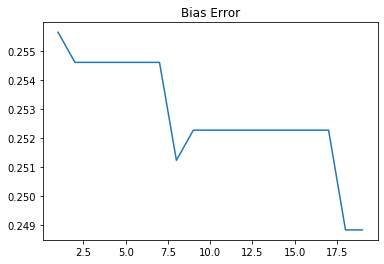

best n_estimator based on bias error =  18


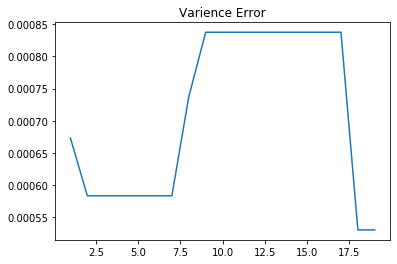

best n_estimator based on variance error =  18


In [62]:
x_axis=np.arange(1,20)
plt.plot(x_axis,auc_be)
plt.title('Bias Error')
plt.show()
print('best n_estimator based on bias error = ',(np.argmin(auc_be)+1))
plt.plot(x_axis,auc_ve)
plt.title('Varience Error')
plt.show()
print('best n_estimator based on variance error = ',(np.argmin(auc_ve)+1))

## Bagging:

In [63]:
clf1=KNeighborsClassifier(n_neighbors=56)
auc_be=[]
auc_ve=[]
for val in np.arange(1,20):
    bagging=BaggingClassifier(n_estimators=val,base_estimator=clf1,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    scores = cross_val_score(bagging, Xs, y,cv=kfold, scoring='roc_auc')
    auc_be.append(np.mean(1-scores))
    auc_ve.append(np.var(scores,ddof=1))
print(np.min(auc_be),np.argmin(auc_be))
print(np.min(auc_ve),np.argmin(auc_ve))

0.2557929650446655 0
0.00028324998379264756 12


#########################################################################################################################

### Choosing the top 2 model:

In [64]:
#knn with 56 neighbors gives the lowest variance error
knn=KNeighborsClassifier(n_neighbors=56)
knn.fit(X_train,y_train)
predict_knn=knn.predict(X_test)
knn.score(X_test,y_test)

0.8216216216216217

In [65]:
print(classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

         0.0       0.93      0.47      0.62        58
         1.0       0.80      0.98      0.88       127

    accuracy                           0.82       185
   macro avg       0.87      0.72      0.75       185
weighted avg       0.84      0.82      0.80       185



Confusion matrix values
[[ 27  31]
 [  2 125]]


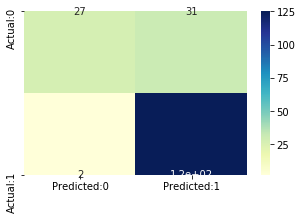

In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict_knn)
print("Confusion matrix values")
print(cm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix, annot=True,cmap="YlGnBu")
plt.show()

In [67]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
accuracy=(TP+TN)/(TP+TN+FP+FN)
misclassification=1-accuracy
print("Accuracy :",accuracy)
print("Misclassification:",misclassification)
print("Sensitivity or True positive rate:",sensitivity)
print("Specificity or True negative rate:",specificity)

Accuracy : 0.8216216216216217
Misclassification: 0.17837837837837833
Sensitivity or True positive rate: 0.984251968503937
Specificity or True negative rate: 0.46551724137931033


In [68]:
print("True positives:",TP)
print("True negatives:",TN)
print("Correct predictions:",TP+TN)
print("False positives:",FP," Type I error")
print("False negatives:",FN," Type II error")

True positives: 125
True negatives: 27
Correct predictions: 152
False positives: 31  Type I error
False negatives: 2  Type II error


In [69]:
y_pred_proba=knn.predict_proba(X_test)

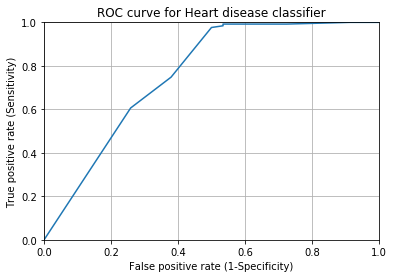

In [70]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [71]:
roc_auc_score(y_test,y_pred_proba[:,1])

0.7612679880532175

---------------------------------------------------------------------------------------------------------

In [72]:
ada_boost=AdaBoostClassifier(n_estimators=18,base_estimator=log_reg,random_state=0)
ada_boost.fit(X_train,y_train)
predict_ada=ada_boost.predict(X_test)
ada_boost.score(X_test,y_test)

0.8216216216216217

In [73]:
print(classification_report(y_test,predict_ada))

              precision    recall  f1-score   support

         0.0       0.93      0.47      0.62        58
         1.0       0.80      0.98      0.88       127

    accuracy                           0.82       185
   macro avg       0.87      0.72      0.75       185
weighted avg       0.84      0.82      0.80       185



Confusion matrix values
[[ 27  31]
 [  2 125]]


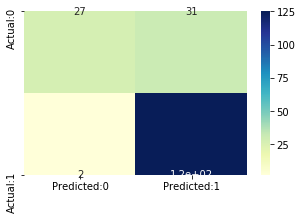

In [74]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict_ada)
print("Confusion matrix values")
print(cm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix, annot=True,cmap="YlGnBu")
plt.show()

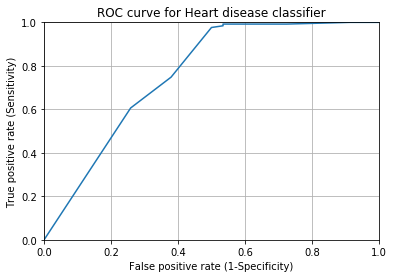

In [78]:
y_pred_proba=knn.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [79]:
roc_auc_score(y_test,y_pred_proba[:,1])

0.7612679880532175